<a href="https://colab.research.google.com/github/Vaibhavrathore1999/ML-building-blocks/blob/main/Central_Limit_Theorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Central Limit Theorem (CLT) — Core Idea

If you take many independent, identically distributed random variables (i.i.d.) with finite mean and variance, and average them, the result tends toward a Normal distribution — no matter what the original distribution was.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def biased_die(probabilities):
  outcomes=np.arange(1,7)
  choice=np.random.choice(outcomes,p=probabilities)
  return choice

In [3]:
def simulations_of_die(n_die,n_simulations,probs=None):
  if probs is None:
    probs=np.ones(6)/6

  outcomes=np.zeros((n_simulations,n_die))
  result=[]
  for i in range(n_simulations):
    for j in range(n_die):
      outcomes[i,j]=biased_die(probs)
  result=np.sum(outcomes,axis=1)
  return outcomes,result

In [13]:
def plot(results,num_dice,num_trials):
    # Plot histogram
    plt.figure(figsize=(10, 6))
    plt.hist(results, bins=50, density=True, alpha=0.7, color='steelblue')
    plt.title(f"Sum of {num_dice} Biased Dice Over {num_trials} Trials")
    plt.xlabel("Sum of Dice Rolls")
    plt.ylabel("Frequency (normalized)")
    plt.grid(True)
    plt.show()

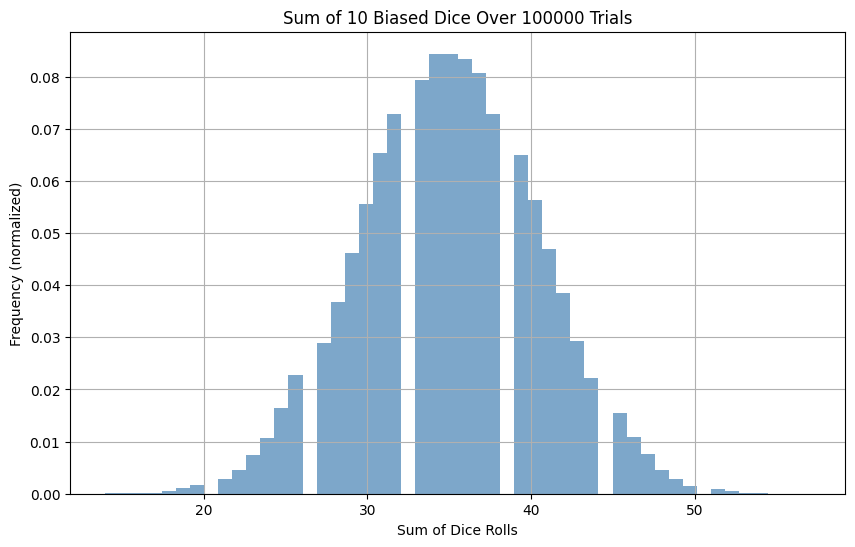

In [14]:
n_die=10
n_runs=10000
outcome,result=simulations_of_die(n_die,n_runs)
plot(result,n_die,n_runs)

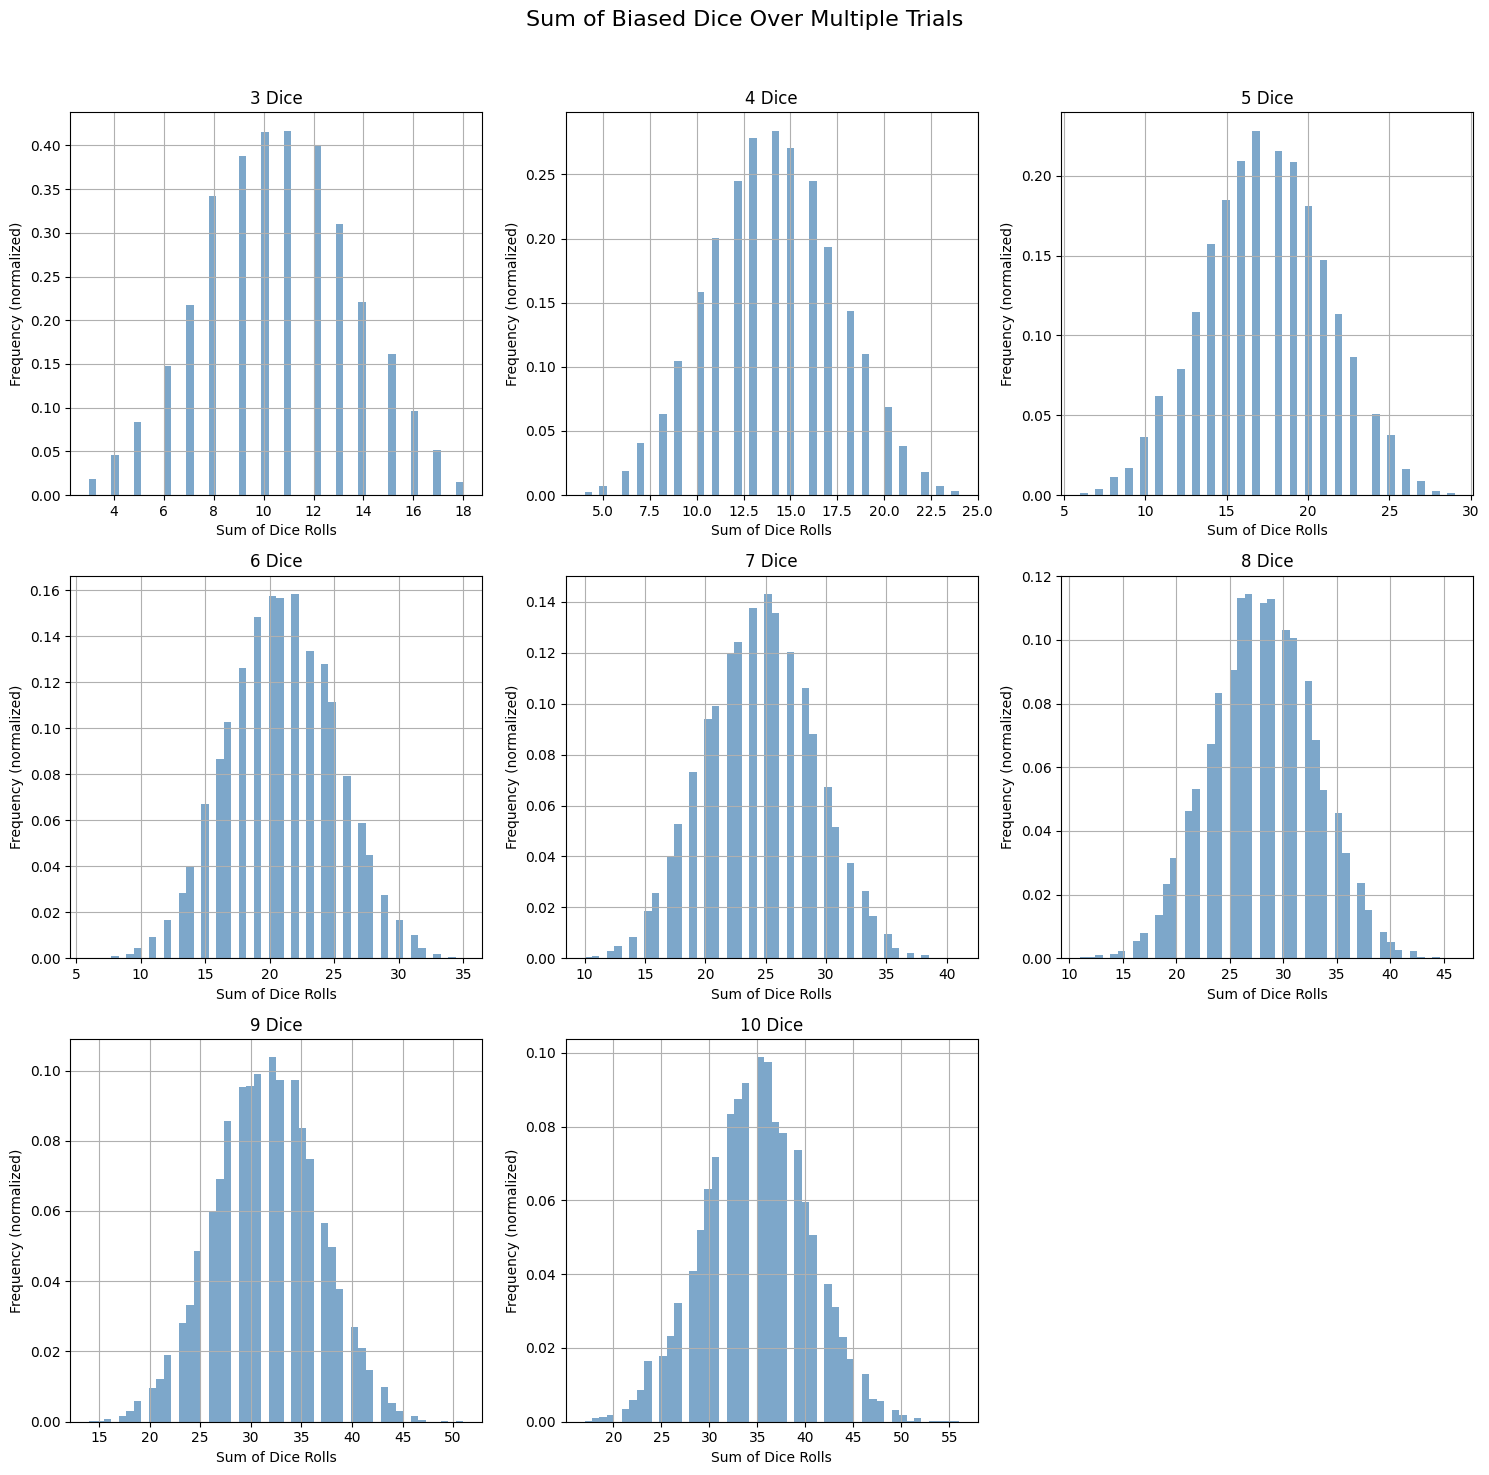

In [16]:
def plot_grid(results_list, num_dice_list, num_trials):
    num_plots = len(results_list)
    cols = 3
    rows = (num_plots + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    fig.suptitle("Sum of Biased Dice Over Multiple Trials", fontsize=16)

    for i, (results, num_dice) in enumerate(zip(results_list, num_dice_list)):
        row = i // cols
        col = i % cols
        ax = axes[row, col] if rows > 1 else axes[col]

        ax.hist(results, bins=50, density=True, alpha=0.7, color='steelblue')
        ax.set_title(f"{num_dice} Dice")
        ax.set_xlabel("Sum of Dice Rolls")
        ax.set_ylabel("Frequency (normalized)")
        ax.grid(True)

    for j in range(num_plots, rows * cols):
        row = j // cols
        col = j % cols
        if rows > 1:
            axes[row, col].set_axis_off()
        else:
            axes[col].set_axis_off()

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

n_runs = 10000
results_list = []
num_dice_list = []

for n_die in range(3, 11):
    outcome, result = simulations_of_die(n_die, n_runs)
    results_list.append(result)
    num_dice_list.append(n_die)

plot_grid(results_list, num_dice_list, n_runs)
